# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the raw data

In [2]:
raw_data = pd.read_csv('Real Life Example.csv')

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
0,BMW,4200,sedan,277,2.0,Petrol,yes,1981,320
1,Mercedes-Benz,7900,van,427,2.0,Diesel,yes,1999,Spriniter 212
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyote,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000,5
unique,4,NaN,3,NaN,NaN,3,1,NaN,5
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN,S 500
freq,2,NaN,2,NaN,NaN,3,5,NaN,1
mean,NaN,13340.000000,NaN,284.400000,3.040000,NaN,NaN,2000.200000,NaN
std,NaN,7600.197366,NaN,117.052552,1.451895,NaN,NaN,11.627553,NaN
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000,NaN
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000,NaN
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000,NaN
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000,NaN


### Determining the variables of interest

In [5]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000
unique,4,NaN,3,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,3,5,NaN
mean,NaN,13340.000000,NaN,284.400000,3.040000,NaN,NaN,2000.200000
std,NaN,7600.197366,NaN,117.052552,1.451895,NaN,NaN,11.627553
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000


### Dealing with missing values

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000
unique,4,NaN,3,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,3,5,NaN
mean,NaN,13340.000000,NaN,284.400000,3.040000,NaN,NaN,2000.200000
std,NaN,7600.197366,NaN,117.052552,1.451895,NaN,NaN,11.627553
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000


### Exploring the PDFs

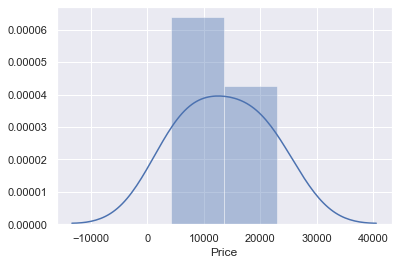

In [7]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [8]:
q = data_no_mv['Price'].quantile(.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,4,4.000000,4,4.000000,4.00,4,4,4.000000
unique,3,NaN,3,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,2,4,NaN
mean,NaN,10925.000000,NaN,295.500000,2.75,NaN,NaN,1998.500000
std,NaN,6175.421713,NaN,132.087092,1.50,NaN,NaN,12.688578
min,NaN,4200.000000,NaN,120.000000,2.00,NaN,NaN,1981.000000
25%,NaN,6975.000000,NaN,237.750000,2.00,NaN,NaN,1994.500000
50%,NaN,10600.000000,NaN,317.500000,2.00,NaN,NaN,2001.000000
75%,NaN,14550.000000,NaN,375.250000,2.75,NaN,NaN,2005.000000


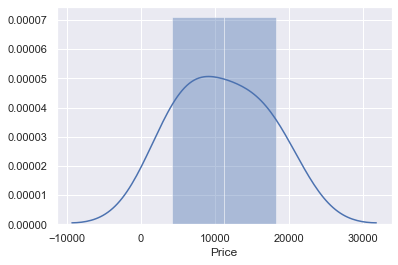

In [9]:
sns.distplot(data_1['Price'])

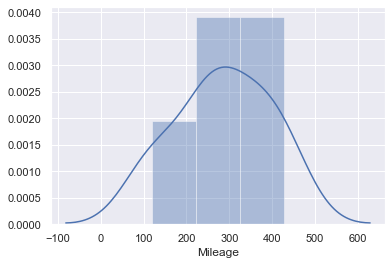

In [10]:
sns.distplot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,3,3.000000,3,3.000000,3.000000,3,3,3.000000
unique,3,NaN,2,NaN,NaN,2,1,NaN
top,Toyote,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,1,NaN,2,NaN,NaN,2,3,NaN
mean,NaN,11933.333333,NaN,251.666667,3.000000,NaN,NaN,1998.333333
std,NaN,7148.659548,NaN,121.005510,1.732051,NaN,NaN,15.534907
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000
25%,NaN,8750.000000,NaN,198.500000,2.000000,NaN,NaN,1992.000000
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000
75%,NaN,15800.000000,NaN,317.500000,3.500000,NaN,NaN,2007.000000


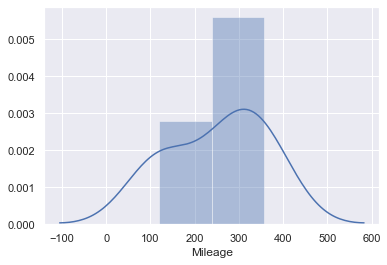

In [12]:
sns.distplot(data_2['Mileage'])

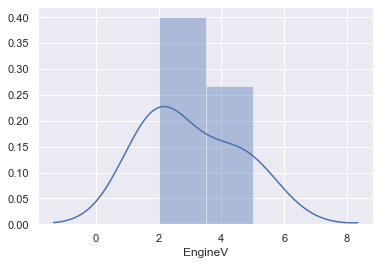

In [13]:
sns.distplot(data_no_mv['EngineV'])

In [14]:
# Since the maximum Engine Value is 6.5
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,3,3.000000,3,3.000000,3.000000,3,3,3.000000
unique,3,NaN,2,NaN,NaN,2,1,NaN
top,Toyote,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,1,NaN,2,NaN,NaN,2,3,NaN
mean,NaN,11933.333333,NaN,251.666667,3.000000,NaN,NaN,1998.333333
std,NaN,7148.659548,NaN,121.005510,1.732051,NaN,NaN,15.534907
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000
25%,NaN,8750.000000,NaN,198.500000,2.000000,NaN,NaN,1992.000000
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000
75%,NaN,15800.000000,NaN,317.500000,3.500000,NaN,NaN,2007.000000


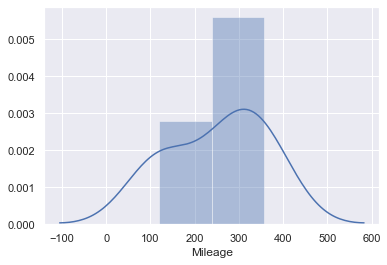

In [15]:
sns.distplot(data_3['Mileage'])

In [16]:
q = data_3['Year'].quantile(.01)
data_4 = data_3[data_3['Year']<q]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,3,3.000000,3,3.000000,3.000000,3,3,3.000000
unique,3,NaN,2,NaN,NaN,2,1,NaN
top,Toyote,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,1,NaN,2,NaN,NaN,2,3,NaN
mean,NaN,11933.333333,NaN,251.666667,3.000000,NaN,NaN,1998.333333
std,NaN,7148.659548,NaN,121.005510,1.732051,NaN,NaN,15.534907
min,NaN,4200.000000,NaN,120.000000,2.000000,NaN,NaN,1981.000000
25%,NaN,8750.000000,NaN,198.500000,2.000000,NaN,NaN,1992.000000
50%,NaN,13300.000000,NaN,277.000000,2.000000,NaN,NaN,2003.000000
75%,NaN,15800.000000,NaN,317.500000,3.500000,NaN,NaN,2007.000000


C:\Users\Udeme\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


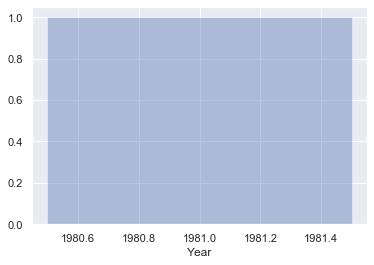

In [17]:
sns.distplot(data_4['Year'])

In [18]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year
count,1,1.0,1,1.0,1.0,1,1,1.0
unique,1,NaN,1,NaN,NaN,1,1,NaN
top,BMW,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,1,NaN,1,NaN,NaN,1,1,NaN
mean,NaN,4200.0,NaN,277.0,2.0,NaN,NaN,1981.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4200.0,NaN,277.0,2.0,NaN,NaN,1981.0
25%,NaN,4200.0,NaN,277.0,2.0,NaN,NaN,1981.0
50%,NaN,4200.0,NaN,277.0,2.0,NaN,NaN,1981.0
75%,NaN,4200.0,NaN,277.0,2.0,NaN,NaN,1981.0


## Checking the OLS Assumption

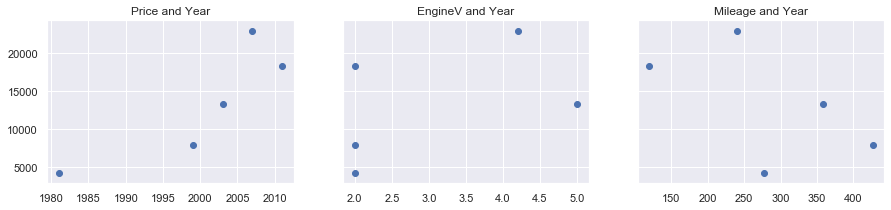

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_no_mv['Year'], data_no_mv['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_no_mv['EngineV'], data_no_mv['Price'])
ax2.set_title('EngineV and Year')

ax3.scatter(data_no_mv['Mileage'], data_no_mv['Price'])
ax3.set_title('Mileage and Year')

plt.show()

### Relaxing the assumption

In [20]:
log_price = np.log(data_no_mv['Price'])
data_no_mv['log_price'] = log_price
data_no_mv

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,log_price
0,BMW,4200,sedan,277,2.0,Petrol,yes,1981,8.342840
1,Mercedes-Benz,7900,van,427,2.0,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyote,18300,crossover,120,2.0,Petrol,yes,2011,9.814656


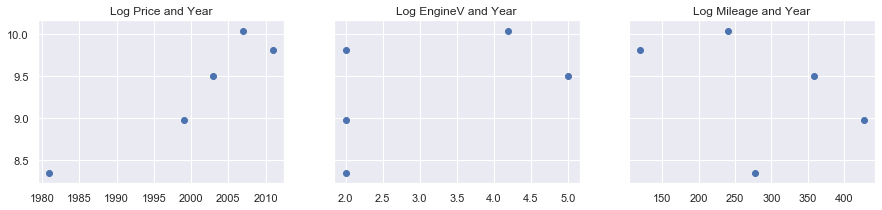

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_no_mv['Year'], data_no_mv['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_no_mv['EngineV'], data_no_mv['log_price'])
ax2.set_title('Log EngineV and Year')

ax3.scatter(data_no_mv['Mileage'], data_no_mv['log_price'])
ax3.set_title('Log Mileage and Year')

plt.show()

In [22]:
data_no_mv = data_no_mv.drop(['Price'], axis = 1)

### Multicollinearity

In [23]:
data_no_mv.columns.values

array(['Brand', 'Body ', 'Mileage', 'EngineV', 'EngineType',
       'Registration', 'Year', 'log_price'], dtype=object)

### Variance inflation factor

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
variables = data_no_mv[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [26]:
vif

,VIF,features
0,8.575118,Mileage
1,11.890866,Year
2,6.754204,EngineV


In [27]:
data_no_mv_mutlicollinearity = data_no_mv.drop(['Year'], axis = 1)

## Create dummy variables

In [28]:
data_with_dummies = pd.get_dummies(data_no_mv_mutlicollinearity, drop_first = True)

In [29]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Toyote,Body _sedan,Body _van,EngineType_Gas,EngineType_Petrol
0,277,2.0,8.342840,1,0,0,1,0,0,1
1,427,2.0,8.974618,0,1,0,0,1,0,0
2,358,5.0,9.495519,0,1,0,1,0,1,0
3,240,4.2,10.043249,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,1,0,0,0,1


### Rearrange the dummies

In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Toyote', 'Body _sedan', 'Body _van',
       'EngineType_Gas', 'EngineType_Petrol'], dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Toyote', 'Body _sedan', 'Body _van',
       'EngineType_Gas', 'EngineType_Petrol']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Toyote,Body _sedan,Body _van,EngineType_Gas,EngineType_Petrol
0,8.342840,277,2.0,1,0,0,1,0,0,1
1,8.974618,427,2.0,0,1,0,0,1,0,0
2,9.495519,358,5.0,0,1,0,1,0,1,0
3,10.043249,240,4.2,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,1,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Create the regression

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_hat = reg.predict(x_train)

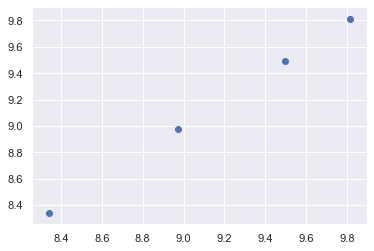

In [39]:
plt.scatter(y_train, y_hat)
plt.show()

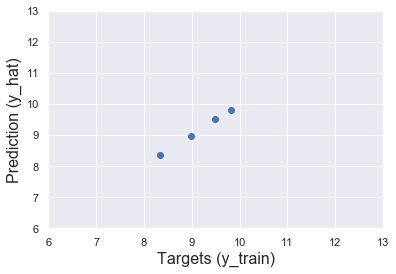

In [40]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 16)
plt.ylabel('Prediction (y_hat)', size = 16)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

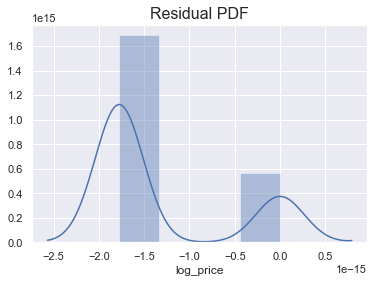

In [41]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size = 16)

In [42]:
reg.score(x_train, y_train)

1.0

### Finding the weight and bias

In [43]:
reg.coef_

array([-0.11869251,  0.09983937, -0.23785935,  0.03652341,  0.19312749,
       -0.10599375, -0.06331219,  0.10804405, -0.03652341])

In [44]:
reg.intercept_

9.198513302966976

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,Mileage,-0.118693
1,EngineV,0.099839
2,Brand_BMW,-0.237859
3,Brand_Mercedes-Benz,0.036523
4,Brand_Toyote,0.193127
5,Body _sedan,-0.105994
6,Body _van,-0.063312
7,EngineType_Gas,0.108044
8,EngineType_Petrol,-0.036523


## Testings

In [46]:
y_hat_test = reg.predict(x_test)

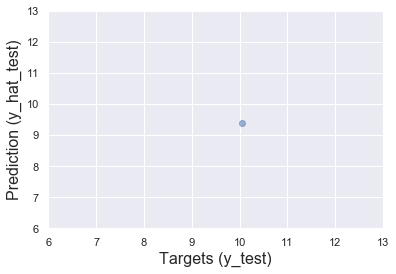

In [47]:
plt.scatter(y_test, y_hat_test, alpha = 0.5)
plt.xlabel('Targets (y_test)', size = 16)
plt.ylabel('Prediction (y_hat_test)', size = 16)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [48]:
# Ploting a dataFrame Performance
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,11671.824091


In [49]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,11671.824091,NaN


In [50]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.043249
Name: log_price, dtype: float64

In [51]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,11671.824091,23000.0


In [53]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [55]:
df_pf['Differencee%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Differencee%
0,11671.824091,23000.0,11328.175909,49.252939


In [56]:
df_pf.describe()

,Predictions,Target,Residual,Differencee%
count,1.000000,1.0,1.000000,1.000000
mean,11671.824091,23000.0,11328.175909,49.252939
std,NaN,NaN,NaN,NaN
min,11671.824091,23000.0,11328.175909,49.252939
25%,11671.824091,23000.0,11328.175909,49.252939
50%,11671.824091,23000.0,11328.175909,49.252939
75%,11671.824091,23000.0,11328.175909,49.252939
max,11671.824091,23000.0,11328.175909,49.252939
